# Visualizing the dataset

After downloading and cleaning the dataset, we move towards exploring it. Through different visualizations, we try to understand if our hypotheses make sense with respect to the data.

In [ ]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Set figsize for plots
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
# Loading the files required
games_df = pd.read_csv("../data/games_cleaned.csv").drop(['Unnamed: 0'], axis=1).set_index('BGGId')
themes_df = pd.read_csv("../data/themes.csv").set_index('BGGId')
mechanics_df = pd.read_csv("../data/mechanics.csv").set_index('BGGId')

In [ ]:
# Basic description of data
games_df.describe()

,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,NumOwned,NumWant,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,1985.494914,1.982131,6.424922,5.685673,1.516374,2.007343,5.707868,12.021072,1467.848164,41.690946,...,21295.352201,21062.680274,0.055827,0.10577,0.161003,0.105633,0.013820,0.050855,0.029190,0.040182
std,212.486214,0.848983,0.932477,0.365311,0.285578,0.693093,15.014643,4.477699,5294.120574,117.255229,...,3637.139987,4219.776597,0.229592,0.30755,0.367542,0.307374,0.116745,0.219707,0.168344,0.196391
min,-3500.000000,0.000000,1.041330,3.574810,0.196023,0.000000,0.000000,2.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,1.333300,5.836960,5.510300,1.320720,2.000000,4.000000,8.000000,150.000000,3.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,1.968800,6.453950,5.546540,1.476880,2.000000,4.000000,11.666667,320.000000,9.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,2.525200,7.052450,5.679890,1.665470,2.000000,6.000000,18.000000,899.000000,28.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,5.000000,9.914290,8.514880,4.277280,10.000000,999.000000,21.000000,166497.000000,2031.000000,...,21926.000000,21926.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Set 5: Understanding the recommended ages

We are mainly interested in understanding the effect of recommended ages with popularity. The columns 'ComAgeRec' and 'MfgAgeRec' show the community and manufacturer recommendations.

In [ ]:
games_df.columns

Index(['Name', 'Description', 'YearPublished', 'GameWeight', 'AvgRating',
       'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers', 'ComAgeRec',
       'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime',
       'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings',
       'NumComments', 'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Kickstarted', 'Rank:boardgame',
       'Rank:strategygames', 'Rank:abstracts', 'Rank:familygames',
       'Rank:thematic', 'Rank:cgs', 'Rank:wargames', 'Rank:partygames',
       'Rank:childrensgames', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens'],
      dtype='object')

### Manufacturer and Community Ages

We study the ages and the number of games designed for each range of ages. Since community ages are means and thus non inegral, for the sake of this analysis we convert them to the lower integer

In [ ]:
games_df['ComAgeRec2'] = games_df['ComAgeRec'].astype('int')

popularity_metrics = ['NumWant','NumWish','NumWeightVotes']
# 'ComMaxPlaytime', 'ComMinPlaytime'

<AxesSubplot:title={'center':'Mfg Age vs Rating'}, xlabel='Age', ylabel='Rating'>

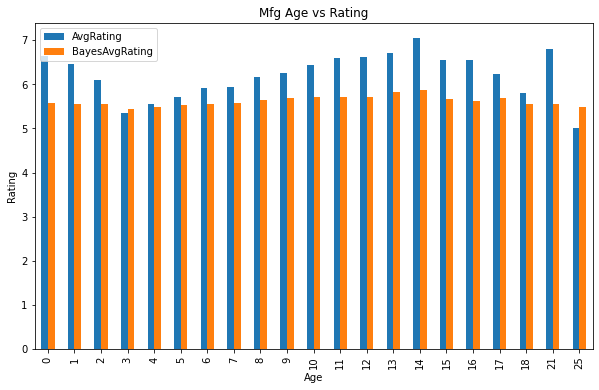

In [ ]:
df = games_df.groupby('MfgAgeRec').mean()
df[['AvgRating','BayesAvgRating']].plot.bar(xlabel='Age',
                                           ylabel='Rating',
                                           title='Mfg Age vs Rating')

<AxesSubplot:title={'center':'Com Age vs Rating'}, xlabel='Age', ylabel='Rating'>

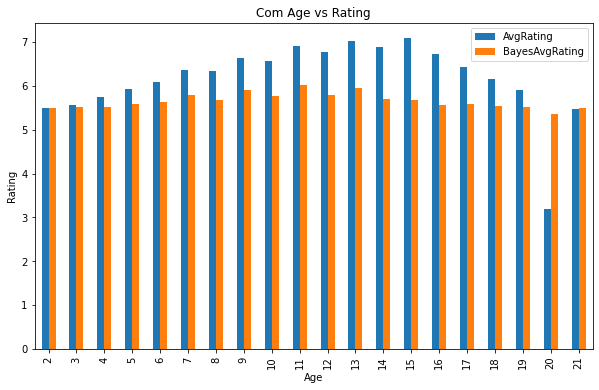

In [ ]:
df = games_df.groupby('ComAgeRec2').mean()
df[['AvgRating','BayesAvgRating']].plot.bar(xlabel='Age',
                                           ylabel='Rating',
                                           title='Com Age vs Rating')

<AxesSubplot:title={'center':'Com Age vs Rating'}, xlabel='Age', ylabel='Rating'>

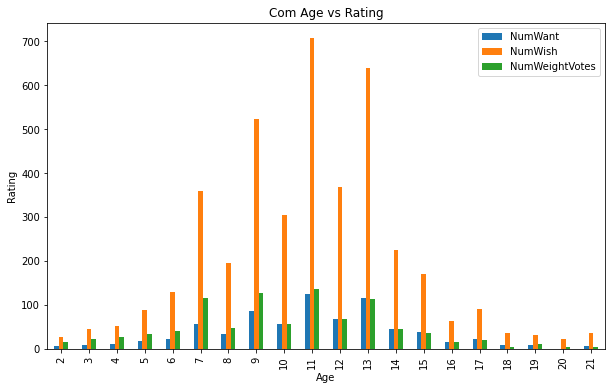

In [ ]:
df = games_df.groupby('ComAgeRec2').mean()
df[popularity_metrics].plot.bar(xlabel='Age',
    ylabel='Rating',title='Com Age vs Rating')

<AxesSubplot:title={'center':'Mfg Age vs Rating'}, xlabel='Age', ylabel='Rating'>

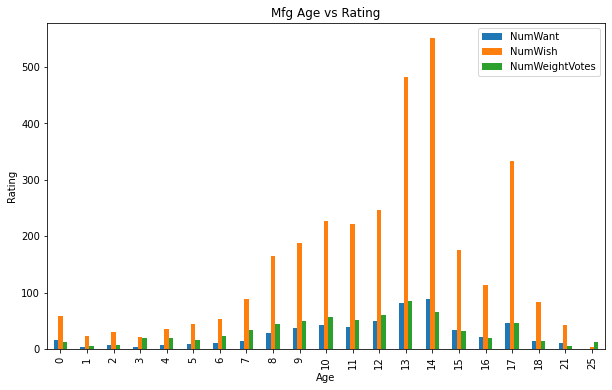

In [ ]:
df = games_df.groupby('MfgAgeRec').mean()
df[popularity_metrics].plot.bar(xlabel='Age',
    ylabel='Rating',title='Mfg Age vs Rating')

### Difference in Community and Manufacturer's recommendations

On finding the difference between the recommended ages, we can get an understanding of how far from the intended community did the game end up being used.

In [ ]:
games_df['ComMfgChange'] = games_df['ComAgeRec'] - games_df['MfgAgeRec']
games_df.ComMfgChange.describe()

count    21925.000000
mean         2.407662
std          5.103704
min        -12.000000
25%         -1.000000
50%          0.400000
75%          6.000000
max         21.000000
Name: ComMfgChange, dtype: float64

While not advisable (safety issues), the community age being lower than the recommended age means that the game is easy to operate and of interest to a wider range of the population. There are 7500+ such games.

<AxesSubplot:title={'center':'Category wise games with wider community reach than expected'}, xlabel='Category', ylabel='Number of games'>

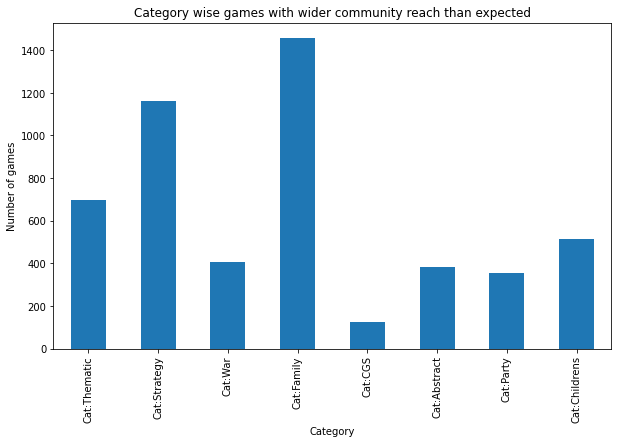

In [ ]:
idx = games_df.ComMfgChange[games_df.ComMfgChange < 0].index
games_df.loc[idx, ['Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens']].sum().plot.bar(
    title='Category wise games with wider community reach than expected',
    xlabel='Category',
    ylabel='Number of games')

## Set 6: Popularity of Different Board Game Categories

Analyzing and studying the popularity of different board game categories is crucial for board game developers publishers, and manufacturers. With the data visualization, the board game industry would be able to know which board game categories they should put more effort in the game development to maximize their profits. Besides that, the board game industry can continue to get more feedback from the users to improve the overall board game designs that have low popularity.

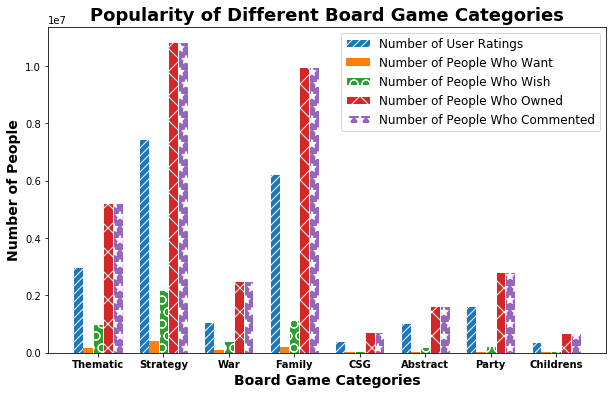

In [ ]:
# Number of People Rated the Board Game
NumUserRatings = games_df['NumUserRatings'].to_numpy()
# Number of People Wanted the Board Game
NumWant = games_df['NumWant'].to_numpy()
# Number of People Wish to have the Board Game
NumWish = games_df['NumWish'].to_numpy()
# Number of People Owned the Board Game
NumOwned = games_df['NumOwned'].to_numpy()
# Number of People Commented about the Board Game
NumComments = games_df['NumOwned'].to_numpy()

# Thematic Category
thematic_cat = games_df['Cat:Thematic'].to_numpy()
# Strategy Category
strategy_cat = games_df['Cat:Strategy'].to_numpy()
# War Category
war_cat = games_df['Cat:War'].to_numpy()
# Family Category
family_cat = games_df['Cat:Family'].to_numpy()
# Crafts, Games, and Science (CGS) Category
CGS_cat = games_df['Cat:CGS'].to_numpy()
# Abstract Category
abstract_cat = games_df['Cat:Abstract'].to_numpy()
# Party Category
party_cat = games_df['Cat:Party'].to_numpy()
# Childrens Category
childrens_cat = games_df['Cat:Childrens'].to_numpy()

# Board Game Categories
board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', 'Abstract', 'Party', 'Childrens']
# Number of User Ratings for Different Board Game Categories
NumUserRatings_list = [0, 0, 0, 0, 0, 0, 0, 0]
# Number of People Wanted for Different Board Game Categories
NumWant_list = [0, 0, 0, 0, 0, 0, 0, 0]
# Number of People Wish to have for Different Board Game Categories
NumWish_list = [0, 0, 0, 0, 0, 0, 0, 0]
# Number of People Owned for Different Board Game Categories
NumOwned_list = [0, 0, 0, 0, 0, 0, 0, 0]
# Number of People Commented for Different Board Game Categories
NumComments_list = [0, 0, 0, 0, 0, 0, 0, 0]


# Count the numbers of user ratings, wanted, wished, owned, and comments for all categoies
for idx in range(0, len(games_df)):
    
    # If it is a thematic category, starts counting
    if thematic_cat[idx] == 1:
        
        # Update counts
        NumUserRatings_list[0] += NumUserRatings[idx]
        NumWant_list[0] += NumWant[idx]
        NumWish_list[0] += NumWish[idx]
        NumOwned_list[0] += NumOwned[idx]
        NumComments_list[0] += NumComments[idx]
        
    # If it is a startegic category, starts counting
    if strategy_cat[idx] == 1:
        
        # Update counts
        NumUserRatings_list[1] += NumUserRatings[idx]
        NumWant_list[1] += NumWant[idx]
        NumWish_list[1] += NumWish[idx]
        NumOwned_list[1] += NumOwned[idx]
        NumComments_list[1] += NumComments[idx]
        
    # If it is a war category, starts counting
    if war_cat[idx] == 1:
        
        # Update counts
        NumUserRatings_list[2] += NumUserRatings[idx]
        NumWant_list[2] += NumWant[idx]
        NumWish_list[2] += NumWish[idx]
        NumOwned_list[2] += NumOwned[idx]
        NumComments_list[2] += NumComments[idx]
    
    # If it is a family category, starts counting
    if family_cat[idx] == 1:
        
        # Update counts
        NumUserRatings_list[3] += NumUserRatings[idx]
        NumWant_list[3] += NumWant[idx]
        NumWish_list[3] += NumWish[idx]
        NumOwned_list[3] += NumOwned[idx]
        NumComments_list[3] += NumComments[idx]
        
    # If it is a CSG category, starts counting
    if CGS_cat[idx] == 1:
        
        # Update counts
        NumUserRatings_list[4] += NumUserRatings[idx]
        NumWant_list[4] += NumWant[idx]
        NumWish_list[4] += NumWish[idx]
        NumOwned_list[4] += NumOwned[idx]
        NumComments_list[4] += NumComments[idx]
        
    # If it is a abstract category, starts counting
    if abstract_cat[idx] == 1:
        
        # Update counts
        NumUserRatings_list[5] += NumUserRatings[idx]
        NumWant_list[5] += NumWant[idx]
        NumWish_list[5] += NumWish[idx]
        NumOwned_list[5] += NumOwned[idx]
        NumComments_list[5] += NumComments[idx]
    
    # If it is a party category, starts counting
    if party_cat[idx] == 1:
        
        # Update counts
        NumUserRatings_list[6] += NumUserRatings[idx]
        NumWant_list[6] += NumWant[idx]
        NumWish_list[6] += NumWish[idx]
        NumOwned_list[6] += NumOwned[idx]
        NumComments_list[6] += NumComments[idx]
        
    # If it is a childrens category, starts counting
    if childrens_cat[idx] == 1:
        
        # Update counts
        NumUserRatings_list[7] += NumUserRatings[idx]
        NumWant_list[7] += NumWant[idx]
        NumWish_list[7] += NumWish[idx]
        NumOwned_list[7] += NumOwned[idx]
        NumComments_list[7] += NumComments[idx]

# Plot triple bar graphs
X_axis = np.arange(len(board_game_categories))
  
plt.bar(X_axis - 0.3, NumUserRatings_list, 0.15, label = 'Number of User Ratings', hatch = "///", edgecolor = 'white')
plt.bar(X_axis - 0.15, NumWant_list, 0.15, label = 'Number of People Who Want')
plt.bar(X_axis, NumWish_list, 0.15, label = 'Number of People Who Wish', hatch = "O", edgecolor = 'white')
plt.bar(X_axis + 0.15, NumOwned_list, 0.15, label = 'Number of People Who Owned', hatch = "x", edgecolor = 'white')
plt.bar(X_axis + 0.3, NumComments_list, 0.15, label = 'Number of People Who Commented', hatch = "*", edgecolor = 'white')
  
plt.xticks(X_axis, board_game_categories, fontsize=10, fontweight = 'bold')
plt.xlabel("Board Game Categories", fontsize = 14, fontweight = 'bold')
plt.ylabel("Number of People", fontsize = 14, fontweight = 'bold')
plt.title("Popularity of Different Board Game Categories", fontsize=18, fontweight = 'bold')
plt.legend(prop={'size': 12})
plt.show()




# Set 7 Reimplementation

In [ ]:
df = games_df[['NumExpansions','NumAlternates','NumOwned_log','NumImplementations']]
df = df.drop(df.index[df['NumExpansions'] <1])
df = df.drop(df.index[df['NumExpansions'] >20])
df = df.drop(df.index[df['NumAlternates'] <1])
df = df.drop(df.index[df['NumAlternates'] >20])
df = df.drop(df.index[df['NumImplementations'] >10])
df2 = df.groupby('NumExpansions')['NumOwned_log'].sum()
ax = df2.plot.area()
ax.set_ylabel("Log10 of number of people")
ax.set_xlabel("Number of Expansions")

In [ ]:
df1 = df.groupby('NumImplementations')['NumOwned_log'].sum()
ax = df1.plot.area()
ax.set_ylabel("Log10 of number of people")
ax.set_xlabel("Number of Implementations")

In [ ]:
df3 = df.groupby('NumAlternates')['NumOwned_log'].sum()
ax = df3.plot.area()
ax.set_ylabel("Log10 of number of people")
ax.set_xlabel("Number of Alternates")

## Set 8: Play time

We are mainly interested in understanding the effect of play time of a game with its popularity. The column 'MfgPlaytime' show the play time as per the manufacturer recommendations. The columns 'ComMinPlaytime' and 'ComMaxPlaytime'show the minimum and maximun play time of the game as per the community



In [ ]:
games_df['MfgPlaytime_log'] = np.log2(games_df['MfgPlaytime'], where=games_df['MfgPlaytime'] > 0)
df = games_df[['MfgPlaytime_log']]
fig = df.plot.hist(bins=30)
plt.suptitle('Log2 of Manufacturer reccomended Play time', x=0.5, y=1, ha='center')

In [ ]:
games_df['NumOwned_log'] = np.log10(games_df['NumOwned'], where=games_df['NumOwned'] > 0)
games_df['NumWant_log'] = np.log10(games_df['NumWant'], where=games_df['NumWant'] > 0)
games_df['NumWish_log'] = np.log10(games_df['NumWish'], where=games_df['NumWish'] > 0)
df = games_df[['MfgPlaytime_log','NumOwned_log','NumWant_log','NumWish_log']]
df = df.drop(df.index[df['MfgPlaytime_log'] >10])
df = df.groupby('MfgPlaytime_log')['NumOwned_log','NumWant_log','NumWish_log'].sum()
ax = df.plot.area()
ax.set_ylabel("Log10 of number of people")
ax.set_xlabel("log2 of Manufacturer reccomended play time")

### Difference in the Community Average play times and the manufacturer reccomended play time

MfgPlaytime' show the play time as per the manufacturer recommendations. The columns 'ComMinPlaytime' and 'ComMaxPlaytime'show the minimum and maximun play time of the game as per the community


In [ ]:
k = games_df['MfgPlaytime']- ((games_df['ComMinPlaytime'] + games_df['ComMaxPlaytime'])/2)
games_df['ComMfgChange'] =  np.log2(k, where=k > 0)
df = games_df[['ComMfgChange']]
df = df.drop(df.index[df['ComMfgChange'] >200])

df.plot.hist()

## Set 9: Effect of Kickstart

As a new manufacturer, it is also interesting to see what effect Kickstarter campaigns have had. For example, we presumed that,
1. Kickstarter programs generate a buzz even before the games has been developed at no expenses
2. Certain categories have a higher change of getting on Kickstarter than others

### Category wise successful Kickstarted games

<AxesSubplot:title={'center':'Category wise Kickstarted Games'}, xlabel='Categories', ylabel='Counts'>

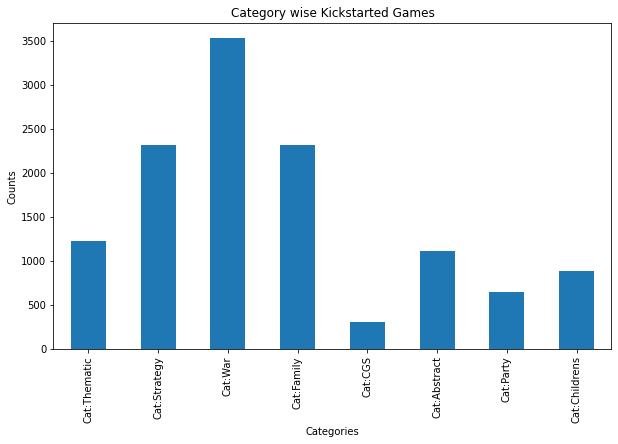

In [ ]:
df = games_df.set_index(['Kickstarted'])[['Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens']]
df.sum().plot.bar(xlabel='Categories', ylabel='Counts', title='Category wise Kickstarted Games')

In [ ]:
df = df.groupby(df.index).sum().T

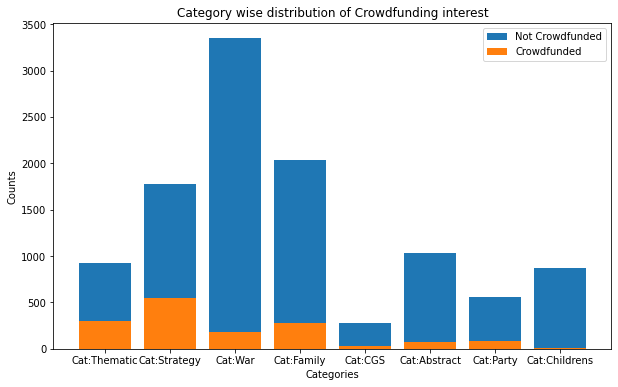

In [ ]:
plt.bar(df.index.tolist(), df[0])
plt.bar(df.index.tolist(), df[1])
plt.legend(['Not Crowdfunded','Crowdfunded'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Category wise distribution of Crowdfunding interest')

del df

### Theme wise successful Kickstarted games

There are nearly 200+ themes and most of them barely have any crowdfunding. Thus we consider only the effect of those themes where the number of games crowdfunded is over 100

<AxesSubplot:title={'center':'Kickstarted games by Theme'}, xlabel='Theme', ylabel='Counts'>

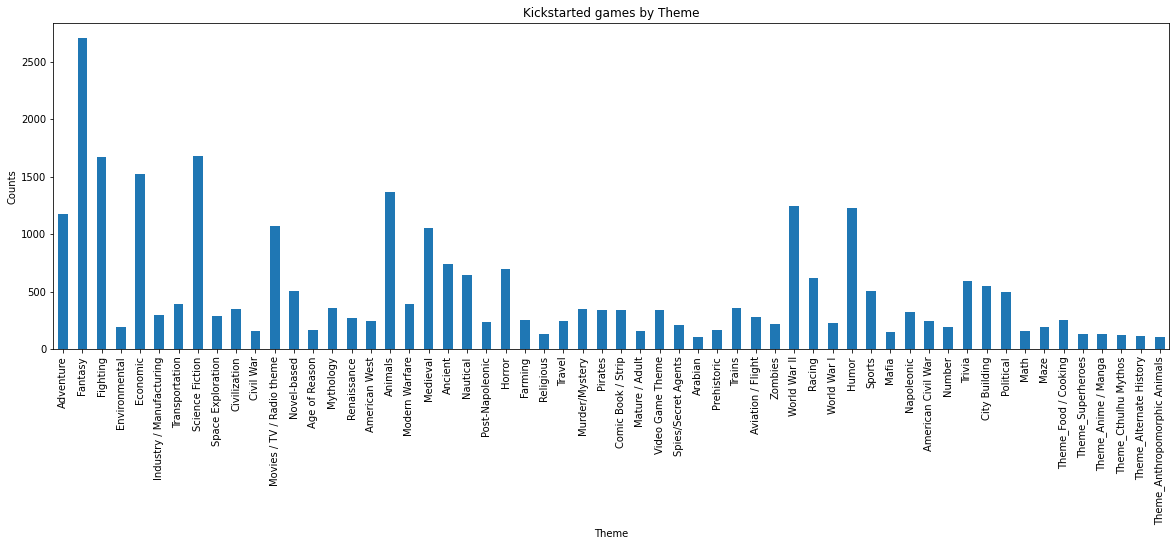

In [ ]:
df = themes_df
df['Kickstarted'] = games_df['Kickstarted']
df2 = df.set_index(['Kickstarted']).sum()
df2[df2>100].plot.bar(xlabel='Theme', ylabel='Counts',
            title='Kickstarted games by Theme',
            figsize=(20,6))

### Set 16: Top 10 Board Game Mechanics for Different Board Game Categories
Visualizing the top 10 board game mechanics for different board game categories data is important for the game developers to understand which board game mechanics are the most common for different board game categories. With the user rating data and board game mechanics data, board game developers can determine which board games mechanics designs are considered a success and which are not. Including the right board game design, mechanics are crucial to capture the interests of board game lovers and increase player engagement towards the board game.

In [ ]:
# Initialize Board Game Mechanics list
board_game_mechanics = []

# Different Type of Board Game Mechanics list
for idx in range(0, len(mechanics_df.columns)):
    
    board_game_mechanics.append(mechanics_df.columns[idx])
    
    
# Initialize an array that stores counts of Row = Board Game Mechanics, Column = Board Game Categories
board_game_Mech_vs_Catg = np.zeros((len(mechanics_df.columns), len(board_game_categories)))

for idx in range(0, len(games_df)):
    
    # If it is a thematic category, starts counting
    if thematic_cat[idx] == 1:
        
        # Update counts
        board_game_Mech_vs_Catg[:,0] += mechanics_df.iloc[idx].to_numpy()
        
    # If it is a startegic category, starts counting
    if strategy_cat[idx] == 1:
        
        # Update counts
        board_game_Mech_vs_Catg[:,1] += mechanics_df.iloc[idx].to_numpy()
        
    # If it is a war category, starts counting
    if war_cat[idx] == 1:
        
        # Update counts
        board_game_Mech_vs_Catg[:,2] += mechanics_df.iloc[idx].to_numpy()
    
    # If it is a family category, starts counting
    if family_cat[idx] == 1:
        
        # Update counts
        board_game_Mech_vs_Catg[:,3] += mechanics_df.iloc[idx].to_numpy()
        
    # If it is a CSG category, starts counting
    if CGS_cat[idx] == 1:
        
        # Update counts
        board_game_Mech_vs_Catg[:,4] += mechanics_df.iloc[idx].to_numpy()
        
    # If it is a abstract category, starts counting
    if abstract_cat[idx] == 1:
        
        # Update counts
        board_game_Mech_vs_Catg[:,5] += mechanics_df.iloc[idx].to_numpy()
    
    # If it is a party category, starts counting
    if party_cat[idx] == 1:
        
        # Update counts
        board_game_Mech_vs_Catg[:,6] += mechanics_df.iloc[idx].to_numpy()
        
    # If it is a childrens category, starts counting
    if childrens_cat[idx] == 1:
        
        # Update counts
        board_game_Mech_vs_Catg[:,7] += mechanics_df.iloc[idx].to_numpy()

# Convert the board_game_Mech_vs_Catg array to dataframe
board_game_Mech_vs_Catg_df = pd.DataFrame(board_game_Mech_vs_Catg, index = board_game_mechanics, columns = board_game_categories)
board_game_Mech_vs_Catg_df.head(10)

,Thematic,Strategy,War,Family,CSG,Abstract,Party,Childrens
Alliances,7.0,15.0,10.0,0.0,1.0,0.0,1.0,0.0
Area Majority / Influence,99.0,575.0,213.0,161.0,12.0,99.0,3.0,7.0
Auction/Bidding,46.0,366.0,20.0,165.0,5.0,15.0,17.0,11.0
Dice Rolling,663.0,494.0,2408.0,494.0,79.0,89.0,78.0,210.0
Hand Management,324.0,783.0,200.0,716.0,140.0,97.0,137.0,57.0
Simultaneous Action Selection,79.0,190.0,163.0,167.0,11.0,16.0,63.0,24.0
Trick-taking,1.0,36.0,4.0,67.0,1.0,15.0,0.0,5.0
Hexagon Grid,65.0,117.0,2128.0,28.0,2.0,29.0,0.0,0.0
Once-Per-Game Abilities,9.0,14.0,3.0,5.0,0.0,2.0,0.0,0.0
Set Collection,90.0,464.0,22.0,684.0,16.0,72.0,60.0,120.0


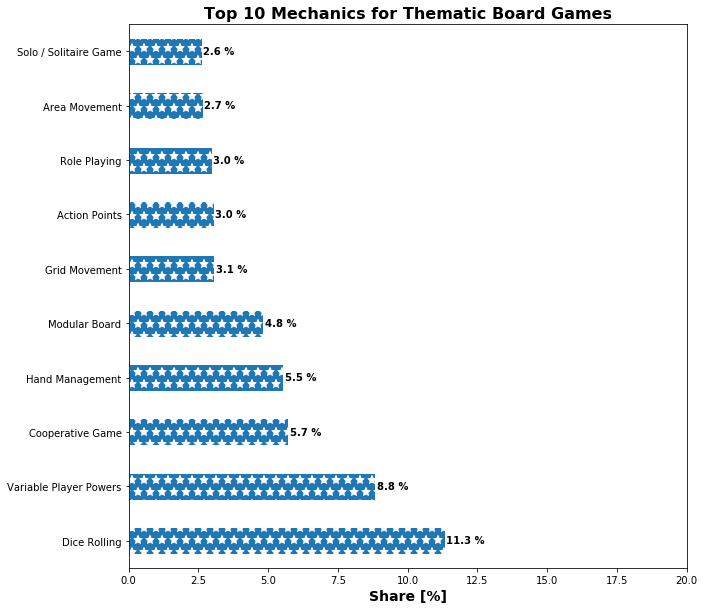

In [ ]:
#board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', ' Abstract', 'Party', 'Childrens']
board_game_Mech_vs_Catg_percent_df = board_game_Mech_vs_Catg_df / board_game_Mech_vs_Catg_df.sum(axis=0).to_numpy() * 100
# Top 10 mechanics for thematic board game category
sorted_thematic_df = board_game_Mech_vs_Catg_percent_df.nlargest(10, 'Thematic')

# Plot graphs
plt.figure(figsize=(10,10))
ax1 = board_game_Mech_vs_Catg_percent_df['Thematic'].sort_values(ascending=False).head(10).plot(kind='barh', hatch = "*", edgecolor = 'white')
ax1.set_ylabel("")
ax1.set_title('Top 10 Mechanics for Thematic Board Games', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 20])
ax1.set_xlabel("Share [%]", fontsize = 14, fontweight = 'bold')

# Annotate the percentage value
for i, perc in enumerate(sorted_thematic_df.iloc[:10,0]):

    ax1.text(perc + 0.05, i -0.05, f'{sorted_thematic_df.iloc[i,0]:0.1f} %', color='black', fontweight='bold')
    
plt.show()

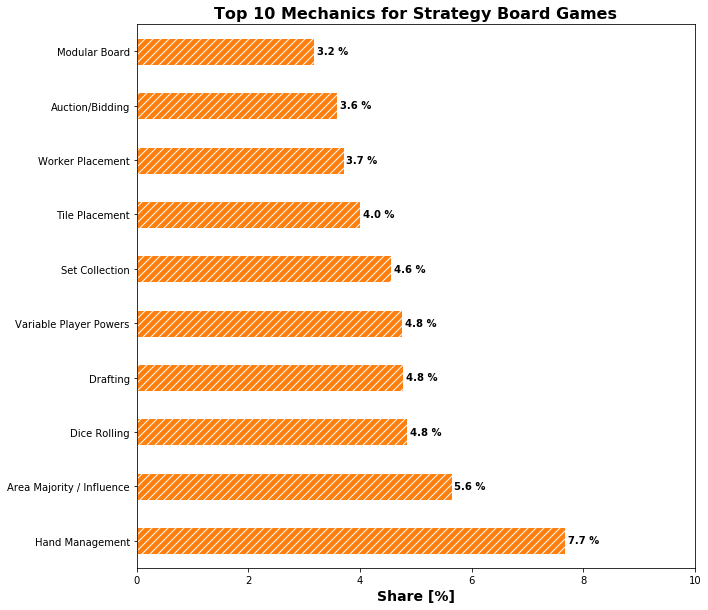

In [ ]:
#board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', 'Abstract', 'Party', 'Childrens']
# Top 10 mechanics for strategy board game category
sorted_strategy_df = board_game_Mech_vs_Catg_percent_df.nlargest(10, 'Strategy')

plt.figure(figsize=(10,10))
ax1 = board_game_Mech_vs_Catg_percent_df['Strategy'].sort_values(ascending=False).head(10).plot(kind='barh', color='#ff7f0e', hatch = "///", edgecolor = 'white')
ax1.set_ylabel("")
ax1.set_title('Top 10 Mechanics for Strategy Board Games', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 10])
ax1.set_xlabel("Share [%]", fontsize = 14, fontweight = 'bold')

# Annotate the percentage value
for i, perc in enumerate(sorted_strategy_df.iloc[:10,1]):

    ax1.text(perc + 0.05, i -0.05, f'{sorted_strategy_df.iloc[i,1]:0.1f} %', color='black', fontweight='bold')
    
plt.show()

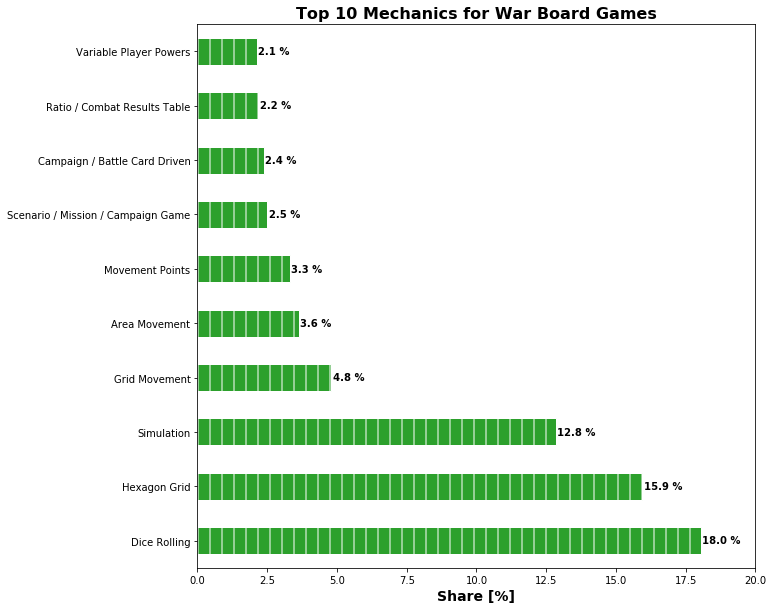

In [ ]:
#board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', 'Abstract', 'Party', 'Childrens']
# Top 10 mechanics for war board game category
sorted_war_df = board_game_Mech_vs_Catg_percent_df.nlargest(10, 'War')

plt.figure(figsize=(10,10))
ax1 = board_game_Mech_vs_Catg_percent_df['War'].sort_values(ascending=False).head(10).plot(kind='barh', color='#2ca02c', hatch = "|", edgecolor = 'white')
ax1.set_ylabel("")
ax1.set_title('Top 10 Mechanics for War Board Games', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 20])
ax1.set_xlabel("Share [%]", fontsize = 14, fontweight = 'bold')

# Annotate the percentage value
for i, perc in enumerate(sorted_war_df.iloc[:10,2]):

    ax1.text(perc + 0.05, i -0.05, f'{sorted_war_df.iloc[i,2]:0.1f} %', color='black', fontweight='bold')
    
plt.show()

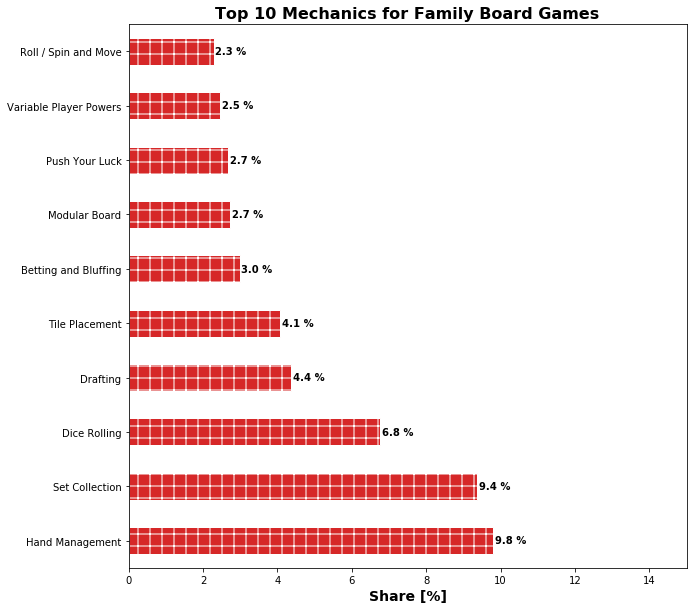

In [ ]:
#board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', 'Abstract', 'Party', 'Childrens']
# Top 10 mechanics for family board game category
sorted_family_df = board_game_Mech_vs_Catg_percent_df.nlargest(10, 'Family')

plt.figure(figsize=(10,10))
ax1 = board_game_Mech_vs_Catg_percent_df['Family'].sort_values(ascending=False).head(10).plot(kind='barh', color = '#d62728', hatch = "+", edgecolor = 'white')
ax1.set_ylabel("")
ax1.set_title('Top 10 Mechanics for Family Board Games', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 15])
ax1.set_xlabel("Share [%]", fontsize = 14, fontweight = 'bold')

# Annotate the percentage value
for i, perc in enumerate(sorted_family_df.iloc[:10,3]):

    ax1.text(perc + 0.05, i -0.05, f'{sorted_family_df.iloc[i,3]:0.1f} %', color='black', fontweight='bold')
    
plt.show()

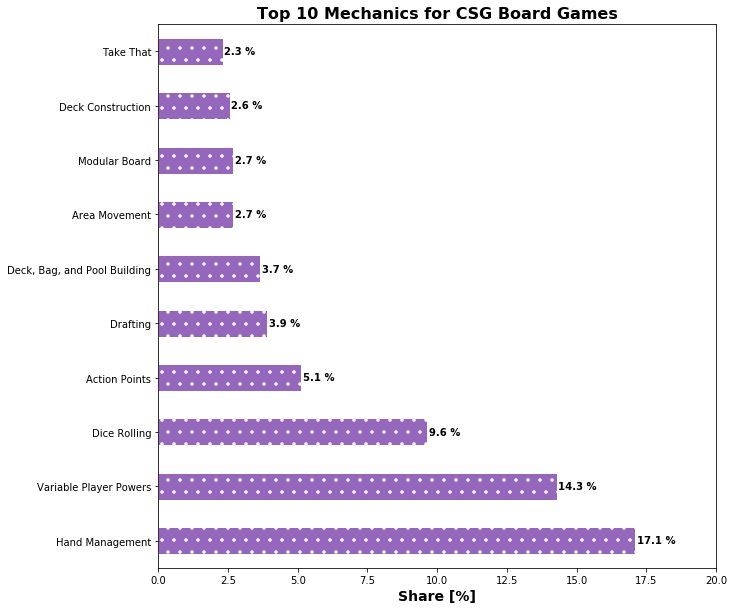

In [ ]:
#board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', 'Abstract', 'Party', 'Childrens']
# Top 10 mechanics for CSG board game category
sorted_CSG_df = board_game_Mech_vs_Catg_percent_df.nlargest(10, 'CSG')

plt.figure(figsize=(10,10))
ax1 = board_game_Mech_vs_Catg_percent_df['CSG'].sort_values(ascending=False).head(10).plot(kind='barh', color = '#9467bd', hatch = ".", edgecolor = 'white')
ax1.set_ylabel("")
ax1.set_title('Top 10 Mechanics for CSG Board Games', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 20])
ax1.set_xlabel("Share [%]", fontsize = 14, fontweight = 'bold')

# Annotate the percentage value
for i, perc in enumerate(sorted_CSG_df.iloc[:10,4]):

    ax1.text(perc + 0.05, i -0.05, f'{sorted_CSG_df.iloc[i,4]:0.1f} %', color='black', fontweight='bold')
    
plt.show()

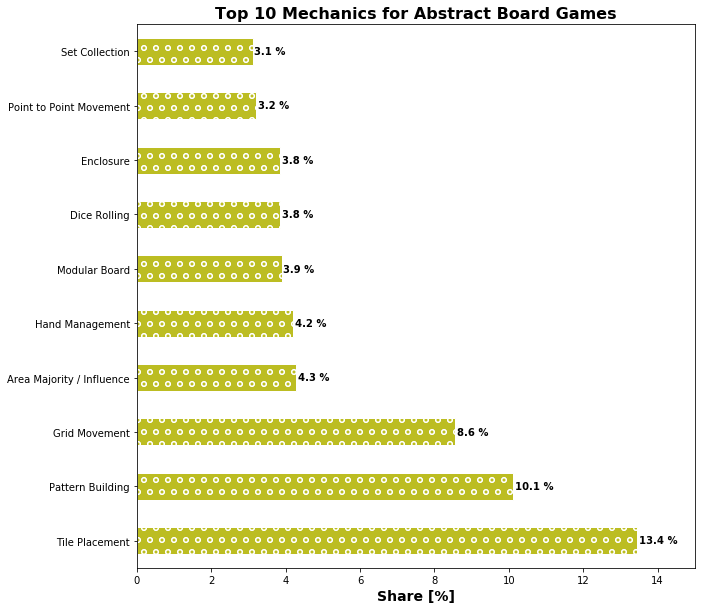

In [ ]:
#board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', 'Abstract', 'Party', 'Childrens']
# Top 10 mechanics for Abstract board game category
sorted_Abstract_df = board_game_Mech_vs_Catg_percent_df.nlargest(10, 'Abstract')

plt.figure(figsize=(10,10))
ax1 = board_game_Mech_vs_Catg_percent_df['Abstract'].sort_values(ascending=False).head(10).plot(kind='barh', color = '#bcbd22', hatch = "o", edgecolor = 'white')
ax1.set_ylabel("")
ax1.set_title('Top 10 Mechanics for Abstract Board Games', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 15])
ax1.set_xlabel("Share [%]", fontsize = 14, fontweight = 'bold')

# Annotate the percentage value
for i, perc in enumerate(sorted_Abstract_df.iloc[:10,5]):

    ax1.text(perc + 0.05, i -0.05, f'{sorted_Abstract_df.iloc[i,5]:0.1f} %', color='black', fontweight='bold')
    
plt.show()

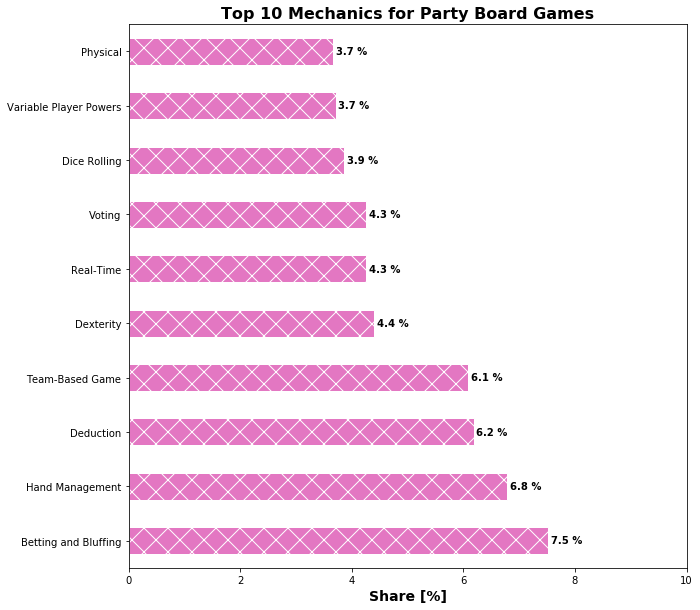

In [ ]:
#board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', 'Abstract', 'Party', 'Childrens']
# Top 10 mechanics for Party board game category
sorted_Party_df = board_game_Mech_vs_Catg_percent_df.nlargest(10, 'Party')

plt.figure(figsize=(10,10))
ax1 = board_game_Mech_vs_Catg_percent_df['Party'].sort_values(ascending=False).head(10).plot(kind='barh', color='#e377c2', hatch = "x", edgecolor = 'white')
ax1.set_ylabel("")
ax1.set_title('Top 10 Mechanics for Party Board Games', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 10])
ax1.set_xlabel("Share [%]", fontsize = 14, fontweight = 'bold')

# Annotate the percentage value
for i, perc in enumerate(sorted_Party_df.iloc[:10,6]):

    ax1.text(perc + 0.05, i -0.05, f'{sorted_Party_df.iloc[i,6]:0.1f} %', color='black', fontweight='bold')
    
plt.show()

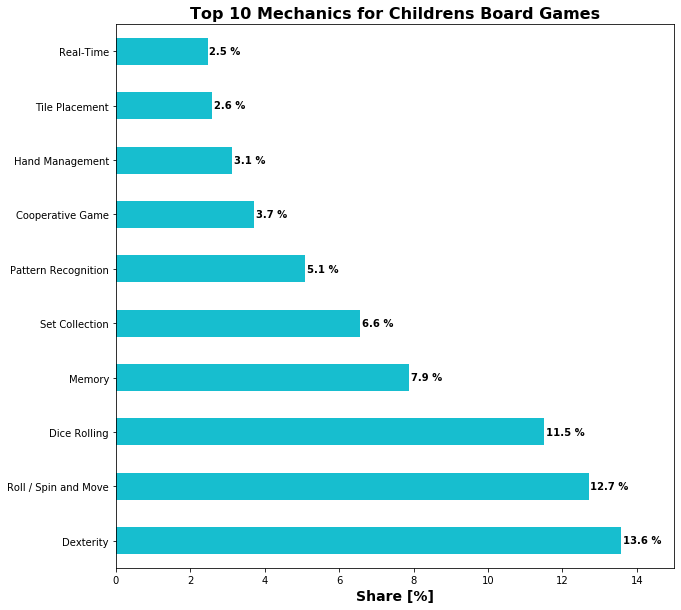

In [ ]:
#board_game_categories = ['Thematic', 'Strategy', 'War', 'Family', 'CSG', 'Abstract', 'Party', 'Childrens']
# Top 10 mechanics for Childrens board game category
sorted_Childrens_df = board_game_Mech_vs_Catg_percent_df.nlargest(10, 'Childrens')

plt.figure(figsize=(10,10))
ax1 = board_game_Mech_vs_Catg_percent_df['Childrens'].sort_values(ascending=False).head(10).plot(kind='barh', color='#17becf')
ax1.set_ylabel("")
ax1.set_title('Top 10 Mechanics for Childrens Board Games', fontweight='bold', fontsize = 16)
ax1.set_xlim([0, 15])
ax1.set_xlabel("Share [%]", fontsize = 14, fontweight = 'bold')

# Annotate the percentage value
for i, perc in enumerate(sorted_Childrens_df.iloc[:10,7]):

    ax1.text(perc + 0.05, i -0.05, f'{sorted_Childrens_df.iloc[i,7]:0.1f} %', color='black', fontweight='bold')
    
plt.show()